# Importing Libraries

In [1]:
import pandas as pd
import nltk 
import regex as re
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Loading Data

In [2]:
# Loading the dataset
file = "/Users/dileepkumarkatla/Downloads/un-general-debates-blueprint (1).csv"
df = pd.read_csv(file)

# Displaying the first 20 rows of the dataframe
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


# Text Preprocessing: Tokenization and Stopword Removal

In [3]:
# Getting a set of English stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

# Tokenization and stopword removal functions
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

{'shan', 'at', 'who', "won't", 'isn', 'her', 'to', 'hers', "wasn't", 'y', 'doesn', 'under', "you've", 'between', 'below', 'when', 'am', 'these', 'same', 'aren', 'if', "that'll", 'themselves', 'theirs', 'will', 'both', 'there', 'haven', 'yourself', 'ain', "aren't", 'not', 'mustn', "weren't", 'whom', 'this', "hasn't", 'against', 'so', 'up', 'after', 'but', "mightn't", "you're", 'only', 'each', 'you', 'why', 'himself', 'with', 'it', "wouldn't", 'having', 'very', "don't", 'your', 'out', 't', 'no', 'his', 'o', 'we', 'shouldn', 'on', 'didn', 'wouldn', "you'd", 'or', 'all', 'are', 'being', 'them', 'nor', 'just', 'is', 'the', 's', 'mightn', 'here', "needn't", 'of', 'about', "isn't", 'above', 'does', 'some', 'were', 'such', 'in', 'did', 'he', 'do', "she's", "mustn't", 'as', 'him', 'she', "you'll", 'during', 'other', 'then', 'into', 'my', 'those', 'they', 'which', 'too', 'while', 'yours', 'i', 'hadn', 'couldn', 'needn', 'that', 'their', 'should', "shan't", 'now', 'any', "hadn't", 'can', 'by', 'm

# Creating a pipeline

In [4]:
# Pipeline for text preparation
pipeline = [str.lower, tokenize, remove_stop]

# Function to prepare text using the specified pipeline
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

# Applying text preparation pipeline to the 'text' column and storing results in 'tokens' column
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

# Token Frequency Analysis

In [5]:
# Counting token frequencies
counter = Counter()
df['tokens'].map(counter.update)

# Creating a dataframe for token frequencies
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
# Filtering out tokens with frequency less than 1
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


# Word Cloud Generation

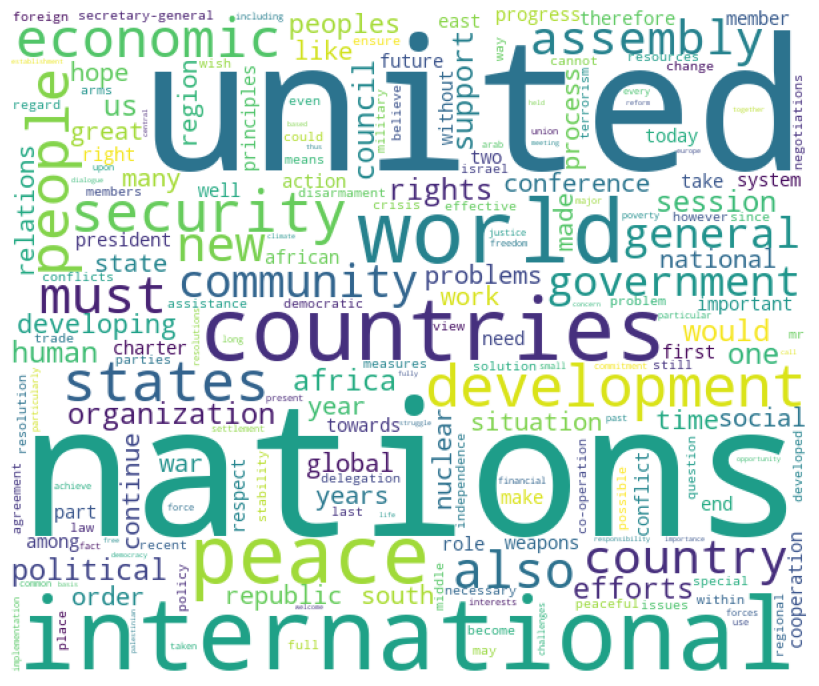

In [6]:
# Generating a word cloud based on token frequencies
wc = WordCloud(background_color='white', width=600, height=500, margin=3)
wc.fit_words(freq_df['freq'].to_dict())
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# TF-IDF Calculation

In [7]:
# Function to compute inverse document frequency (IDF)
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # Counting tokens
    counter = Counter()
    df[column].map(update)
    # Creating dataframe and computing IDF
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df']) + 0.1
    idf_df.index.name = 'token'
    return idf_df

# Computing IDF for the tokens
idf_df = compute_idf(df)

# Computing TF-IDF scores for tokens
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


# Word Cloud Generation

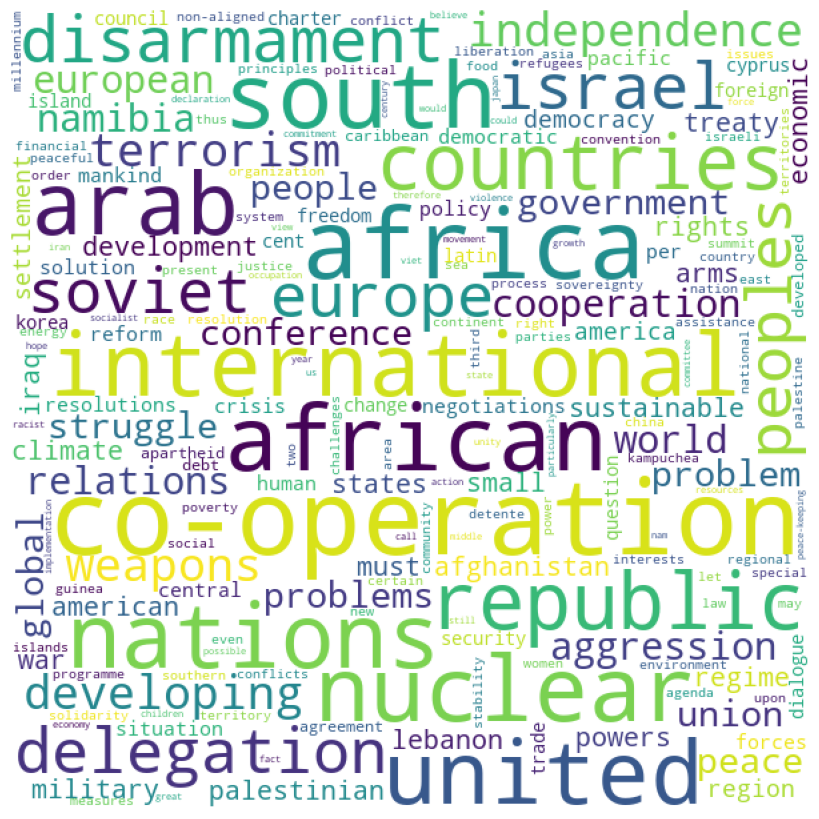

In [8]:
# Generating a word cloud based on TF-IDF scores
wc = WordCloud(background_color='white', width=600, height=600, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict())
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Keyword Counting

In [9]:
# Function to count occurrences of keywords in tokens
# Calculate the number of tokens for each row and store it in the 'num_tokens' column
df['num_tokens'] = df['tokens'].apply(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

# Function to count keyword occurrences by a specified column
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True)  # Resetting index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by]  # Copying the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

# Heatmap Visualization

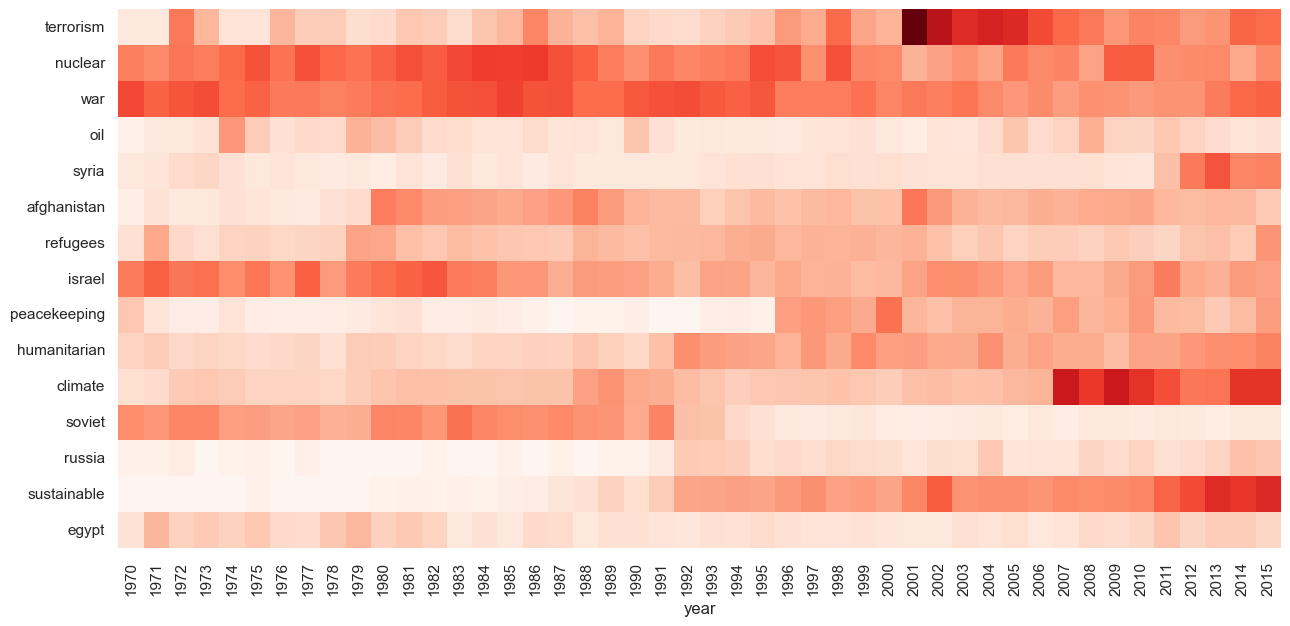

In [10]:
# Specifying keywords of interest
keywords = ['terrorism', 'nuclear', 'war', 'oil', 'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 'humanitarian', 'climate', 'soviet', 'russia', 'sustainable', 'egypt']  

# Counting keyword occurrences by year
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# Computing relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# Applying square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
# Plotting heatmap
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
# Resetting font scale
sns.set(font_scale=1) 